In [1]:
%pylab inline
n=36;m=10;a=1.05
J=169
corr_factor = 1.
import numpy as np
import csv
data_root='../../BOSS_DR12_Data/v8/'#/5gos/'
data_root2='../../BOSS_DR12_Data/v8/'#5alan/'
file_root_jack=data_root+'CovMatricesJack/'
file_root_all=data_root+'CovMatricesAll/'
file_root_all2=data_root2+'CovMatricesAll/'
file_root_jack2=data_root2+'CovMatricesJack/'
rr_true_file =data_root+'weight_files/binned_pair_counts_n%d_m%d_j%d.dat'%(n,m,J)
weights_file = data_root+'weight_files/jackknife_weights_n%d_m%d_j%d.dat'%(n,m,J)
counts_file = data_root+'CovMatricesAll/total_counts_n%d_m%d.txt'%(n,m)
counts_file2=data_root2+'CovMatricesAll/total_counts_n%d_m%d.txt' %(n,m)
total_counts=np.loadtxt(counts_file)+np.loadtxt(counts_file2)

Populating the interactive namespace from numpy and matplotlib


In [2]:
print("%.1e pairs, %.1e triples, %.1e quads attempted"%(total_counts[0],total_counts[1],total_counts[2]))

1.9e+09 pairs, 5.8e+09 triples, 1.7e+10 quads attempted


## 1) Jackknife Weight Matrix

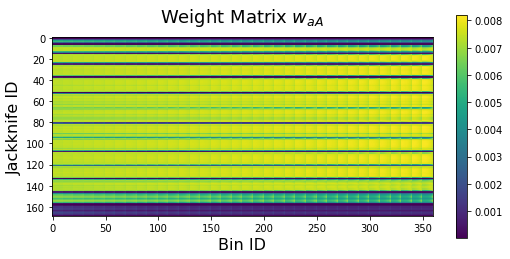

In [3]:
weights=np.loadtxt(weights_file)[:,1:]
plt.matshow(weights);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.gca().xaxis.tick_bottom()
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title(r'Weight Matrix $w_{aA}$',fontsize=FS+2);

In [4]:
def read_RR_all(n,m,file_root,a,string='full'):
    rrfile=file_root+'RR_n%d_m%d_%s.txt' %(n,m,string)
    rr_est = np.loadtxt(rrfile)*corr_factor**2.
    rr_true = np.loadtxt(rr_true_file)
    return rr_est, rr_true

In [5]:
def read_cj_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2j_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3j_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4j_n%d_m%d_%s.txt' %(n,m,string)
    cxfile=file_root+'cxj_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4errj_n%d_m%d_%s.txt' %(n,m,string)
    errcxfile=file_root+'cxerrj_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))*corr_factor**2.
    c3=np.loadtxt(c3file)*corr_factor**3.
    c4=np.loadtxt(c4file)*corr_factor**4.
    cx=np.loadtxt(cxfile)*corr_factor**4.
    errc4=np.loadtxt(errc4file)*corr_factor**8.
    c3=(c3+c3.T)/2.
    c4=(c4+c4.T)/2.
    cx=(cx+cx.T)/2.
    errc4=(errc4+errc4.T)/2.
    c_tot=c4+a**2.*c2+a*c3+cx
    return c2,c3,c4,cx,errc4,c_tot

def read_c_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4err_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))*corr_factor**2.
    c3=np.loadtxt(c3file)*corr_factor**3.
    c4=np.loadtxt(c4file)*corr_factor**4.
    errc4=np.loadtxt(errc4file)*corr_factor**8.
    c3=(c3+c3.T)/2.
    c4=(c4+c4.T)/2.
    errc4=(errc4+errc4.T)/2.
    c_tot=c4+a**2.*c2+a*c3
    return c2,c3,c4,errc4,c_tot

In [6]:
c2j1,c3j1,c4j1,cxj1,c4jerr1,cj_tot1=read_cj_all(n,m,file_root_jack,a)
c21,c31,c41,c4err1,c_tot1=read_c_all(n,m,file_root_all,a)

In [7]:
c2j2,c3j2,c4j2,cxj2,c4jerr2,cj_tot2=read_cj_all(n,m,file_root_jack2,a)
c22,c32,c42,c4err2,c_tot2=read_c_all(n,m,file_root_all2,a)

In [8]:
c2=(c21+c22)/2.
c3=(c31+c32)/2.
c4=(c41+c42)/2.
c4err=(c4err1+c4err2)/2.
c_tot=(c_tot1+c_tot2)/2.
c2j=(c2j1+c2j2)/2.
c3j=(c3j1+c3j2)/2.
c4j=(c4j1+c4j2)/2.
cxj=(cxj1+cxj2)/2.
c4jerr=(c4jerr1+c4jerr2)/2.
cj_tot=(cj_tot1+cj_tot2)/2.

In [9]:
binct4=np.loadtxt(file_root_all+'binct_c4_n%d_m%d_full.txt'%(n,m))
binct2=np.loadtxt(file_root_all+'binct_c2_n%d_m%d_full.txt'%(n,m))
binct3=np.loadtxt(file_root_all+'binct_c3_n%d_m%d_full.txt'%(n,m))
binct4=(binct4+binct4.T)/2.
binct3=(binct3+binct3.T)/2.

## 2) Bin Counts

### 2a) Diagonal Element Bin Counts for $C_2$, $C_3$ and $C_4$

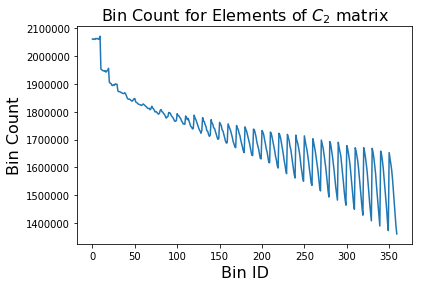

In [10]:
plt.plot(binct2);
plt.ylabel('Bin Count',fontsize=FS);
plt.xlabel('Bin ID',fontsize=FS)
plt.title(r'Bin Count for Elements of $C_2$ matrix',fontsize=FS);

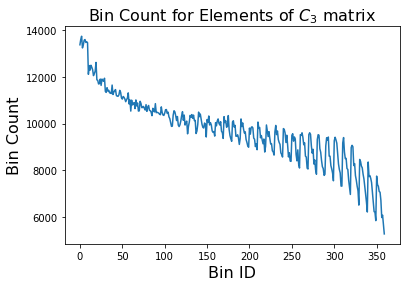

In [11]:
plt.plot(np.diag(binct3));
plt.ylabel('Bin Count',fontsize=FS);
plt.xlabel('Bin ID',fontsize=FS)
plt.title(r'Bin Count for Elements of $C_3$ matrix',fontsize=FS);

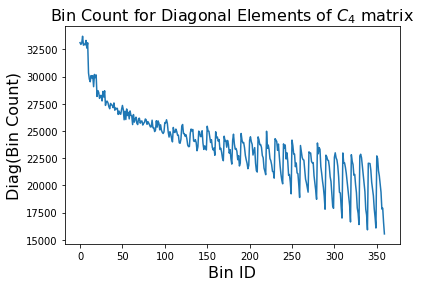

In [12]:
plt.plot(np.diag(binct4));
plt.ylabel('Diag(Bin Count)',fontsize=FS);
plt.xlabel('Bin ID',fontsize=FS)
plt.title(r'Bin Count for Diagonal Elements of $C_4$ matrix',fontsize=FS);

### Bin Count for $C_{3,ab}$ Matrix

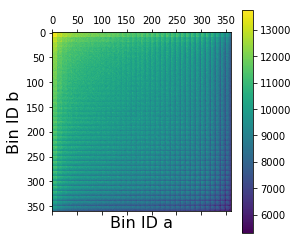

In [13]:
plt.matshow(binct3)#,vmax=np.percentile(binct3,99))
plt.ylabel('Bin ID b',fontsize=FS);
plt.xlabel('Bin ID a',fontsize=FS);
#plt.xlim([0,120])
#plt.ylim([120,0])
plt.colorbar();

### Bin Count for $C_{4,ab}$ Matrix 

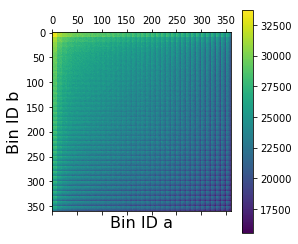

In [14]:
plt.matshow(binct4)
plt.ylabel('Bin ID b',fontsize=FS);
plt.xlabel('Bin ID a',fontsize=FS)
plt.colorbar()

In [15]:
rr_est,rr_true=read_RR_all(n,m,file_root_all,a)

# 3) Total Matrix Plot - $C_{\mathrm{tot},ab}$

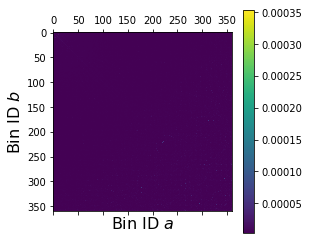

In [16]:
mat=c_tot
plt.matshow(mat,vmax=np.percentile(mat.ravel(),100.),vmin=np.percentile(mat.ravel(),0.05))
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS)
plt.colorbar()

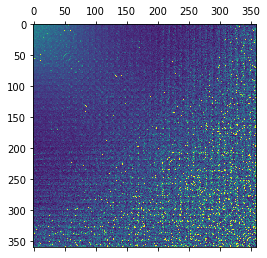

In [17]:
mat=c4
plt.matshow(mat,vmax=np.percentile(mat.ravel(),99.))

# 4) Eigenspectrum

(NB: Eigenvalues are real since we symmetrize matrices)

In [18]:
eigval,eigvec=np.linalg.eigh(c_tot)

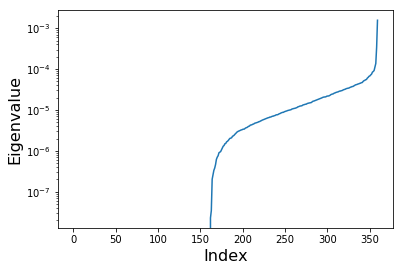

In [19]:
plt.plot(eigval);plt.ylabel('Eigenvalue',fontsize=FS);plt.xlabel('Index',fontsize=FS)
plt.yscale('log');

# 5) Reduced / Whitened Matrices

### 5.1) Compute $C_{ab}r_ar_b$:

In [20]:
r_bins = np.loadtxt('../python/binfile_linear.csv')

In [21]:
ra_rb = np.zeros_like(c_tot)
ra=np.zeros(len(c_tot))
for aa in range(len(c_tot)):
    r_a = (r_bins[aa/m][0]+r_bins[aa/m][1])/2.
    ra[aa]=r_a
    for bb in range(len(c_tot)):
        r_b = (r_bins[bb/m][0]+r_bins[bb/m][1])/2.
        ra_rb[aa,bb]=r_a*r_b
white_mat=c_tot*ra_rb

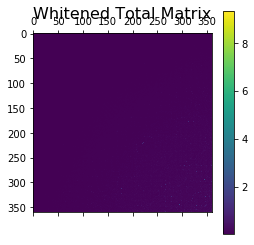

In [22]:
plt.matshow(white_mat,vmax=np.percentile(white_mat,99.999),vmin=np.percentile(white_mat,0.001));
plt.title('Whitened Total Matrix',fontsize=FS)
plt.colorbar();

(220, 140)

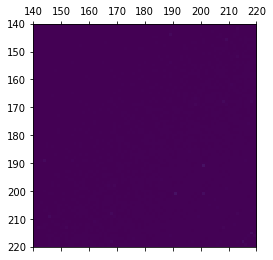

In [23]:
plt.matshow(white_mat)
plt.xlim([140,220])
plt.ylim([220,140])

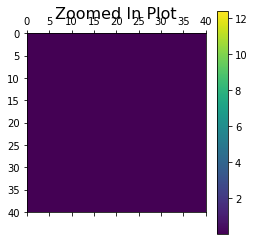

In [24]:
plt.matshow(white_mat)
plt.colorbar()
plt.ylim([40,0])
plt.xlim([0,40]);
plt.title('Zoomed In Plot',fontsize=FS);

### 5.2) Compute reduced matrix = correlation matrix $\frac{C_{ab}}{\sqrt{C_{aa}C_{bb}}}$:

In [25]:
red_mat=np.zeros_like(c_tot)
for aa in range(len(c_tot)):
    for bb in range(len(c_tot)):
        red_mat[aa,bb]=c_tot[aa,bb]/np.sqrt(c_tot[aa,aa]*c_tot[bb,bb])

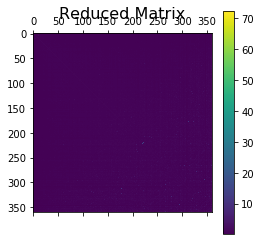

In [26]:
plt.matshow(red_mat)
plt.colorbar();
plt.title('Reduced Matrix',fontsize=FS);

Text(0.5,1.05,'Zoomed In Plot')

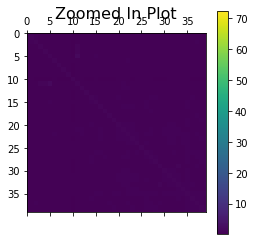

In [27]:
plt.matshow(red_mat)
plt.colorbar();plt.ylim([39,0]);
plt.xlim([0,39]);plt.title('Zoomed In Plot',fontsize=FS)

# 6) Inverse of $C_{\mathrm{tot},ab}$

In [ ]:
prec=np.linalg.inv(c_tot)
import cmocean
vmax=max(prec.ravel())
fig,ax=plt.subplots(1,figsize=(5,5))
cax=ax.matshow(prec,cmap=cmocean.cm.balance,vmax=vmax,vmin=-vmax);FS=16;
plt.gca().xaxis.tick_bottom()
cbar=fig.colorbar(cax);
ax.set_title('Precision Matrix Plot',fontsize=FS)
cbar.ax.tick_params(labelsize=FS-3)

### 6.1) Compute whitened precision matrix i.e. $\psi_{ab}/{r_ar_b}$

In [ ]:
mat=prec/ra_rb
cmap=cmocean.cm.balance
vmax=np.percentile(mat.ravel(),100.)
plt.matshow(mat,vmax=vmax,vmin=-vmax,cmap=cmap);plt.colorbar();
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.gca().xaxis.tick_bottom()
plt.title('Whitened Precision: $\psi_{ab}/r_ar_b$',fontsize=FS-2)
plt.ylabel(r'Bin ID $b$',fontsize=FS);

### 6.2) Reduced Precision Matrix:

In [ ]:
red_prec=np.zeros_like(prec)
for i in range(len(prec)):
    for j in range(len(prec)):
        red_prec[i,j]=prec[i,j]/np.sqrt(prec[i,i]*prec[j,j])
        
plt.matshow(red_prec)

# 7) Disconnected Term

In [ ]:
diff_mat=cxj
import cmocean
fig,ax=plt.subplots(1,figsize=(5,5))
vmax=max(diff_mat.ravel())
cax=ax.matshow(diff_mat,cmap=cmocean.cm.balance,vmax=vmax,vmin=-vmax);FS=16;
plt.gca().xaxis.tick_bottom()
ax.set_ylabel('Bin ID',fontsize=FS)
ax.set_xlabel('Bin ID',fontsize=FS)
cbar=fig.colorbar(cax);
cbar.ax.tick_params(labelsize=FS-3)
plt.title(r'$C^J_{x,ab}=\frac{\sum_A(EE_{aA}-w_{aA}EE_a)(EE_{bA}-w_{bA}EE_b)}{RR_aRR_b\left(1-\sum_B{w_{aB}w_{bB}}\right)}$',fontsize=FS-1);

In [ ]:
diff_mat=cxj
import cmocean
fig,ax=plt.subplots(1,figsize=(5,5))
vmax=max(diff_mat.ravel())
cax=ax.matshow(diff_mat,cmap=cmocean.cm.balance,vmax=vmax,vmin=-vmax);FS=16;
plt.gca().xaxis.tick_bottom()
plt.ylim([40,0])
plt.xlim([0,40])
ax.set_ylabel('Bin ID',fontsize=FS)
ax.set_xlabel('Bin ID',fontsize=FS)
cbar=fig.colorbar(cax);
cbar.ax.tick_params(labelsize=FS-3)
plt.title(r'$C^J_{x,ab}$ - Zoomed In',fontsize=FS+2);

# 8) Compare 2 matrix estimates:

In [ ]:
c_gos=c_tot1
c_alan=c_tot2
inv_alan=np.linalg.inv(c_alan)
diagnostic=np.matmul(c_gos,inv_alan)
plt.matshow(diagnostic)
plt.gca().xaxis.tick_bottom()
plt.title('$C_\mathrm{tot,1}*[C_\mathrm{tot,2}]^{-1}$',fontsize=FS)
plt.colorbar();

Now plot with cut-off color scale:

In [ ]:
plt.matshow(diagnostic,vmax=1.5,vmin=-1.5)
plt.gca().xaxis.tick_bottom()
plt.title('$C_\mathrm{tot,1}*[C_\mathrm{tot,2}]^{-1}$',fontsize=FS)
plt.colorbar();

In [ ]:
# Compute eigenvalues:
diagnostic_eigenvals=np.linalg.eigvalsh(diagnostic)
plt.plot(diagnostic_eigenvals);
plt.ylabel('Eigenvalue',fontsize=FS);plt.xlabel('Label',fontsize=FS);

# 8) Eigenvalue Convergence

In [ ]:
eigs=[];eigscurrent=[]
C_current=np.zeros_like(c_tot)
for i in range(10):
    ctmp=read_c_all(n,m,file_root_all,a,str(i))
    Ctot_i=(ctmp[-1]+ctmp[-1].T)/2.
    C_current=(C_current*i+Ctot_i)/float(i+1)
    eigsi=np.linalg.eigh(Ctot_i)[0]
    eigscurrent.append(np.linalg.eigh(C_current)[0])
    eigs.append(eigsi)

In [ ]:
for i in range(len(eigs)):
    plt.plot(eigs[i])
plt.yscale('log')
plt.ylabel('Eigenvalue Value',fontsize=FS)
plt.xlabel('Eigenvalue Label',fontsize=FS);

In [ ]:
frac_convergence=(eigscurrent-eigscurrent[-1])/(eigscurrent[-1])
for i in range(len(frac_convergence[0])):
    plt.plot(frac_convergence[:,i])
plt.ylabel('Fractional Convergence of Eigenvalue',fontsize=FS-4)
plt.xlabel('Matrix Estimate',fontsize=FS);

# 9) Matrix Visualizations:
### 9.1) Small Region of $C_4$ matrix

In [ ]:
[vmax,vmin]=np.percentile(c4.ravel(),[99.95,0.05])
plt.matshow(c4,vmax=vmax,vmin=vmin)
plt.colorbar()
plt.xlim([0,39]);plt.ylim([39,0]);
plt.xlabel(r'Bin ID $a$',fontsize=FS)
plt.ylabel(r'Bin ID $b$',fontsize=FS);


### 9.2) $\mathrm{diag}(C_4)$ visualization

In [ ]:
R_par=np.zeros(len(c2));
R_per=np.zeros(len(c2));
rbin=np.zeros(len(c2))
thetabin=np.zeros(len(c2))
for i in range(len(c2)):
    rbin[i]=50+i//m*(150.)/n+2.5
    mubin=(i%m)/float(m)+1/(2.*float(m))
    thetabin[i]=np.arccos(mubin)
    R_par[i]=rbin[i]*mubin
    R_per[i]=rbin[i]*np.sqrt(1.-mubin**2.)
RPAR,RPER=np.meshgrid(R_par,R_per)
THE,RR=np.meshgrid(thetabin,rbin)

In [ ]:
plt.scatter(R_par,R_per,c=np.log10(np.diag(c4)),s=400,alpha=0.5); FS=18
plt.colorbar()
plt.title(r'$\log_{10}(\mathrm{diag}$(C4)) Plot',fontsize=FS);plt.ylabel(r'$r_\perp$',fontsize=FS);plt.xlabel(r'$r_\parallel$',fontsize=FS);FS=16

# 10) Plot Diagonal Contributions:

In [ ]:
mat=c4
plt.matshow(mat,vmax=np.percentile(mat.ravel(),99))

In [ ]:
plt.plot(np.diag(c2),label=r'$C_2$')
plt.plot(np.diag(c3),label=r'$C_3$')
plt.plot(np.diag(c4),label=r'$C_4$')
plt.plot(np.diag(a**2.*c2+a*c3+c4),label=r'$C_\mathrm{tot}$')
plt.yscale('log'); FS=16
plt.xlabel('Bin ID',fontsize=FS)
plt.ylabel(r'$diag(C_{Y,ab})$',fontsize=FS);
plt.title('Non-jackknife integrals',fontsize=FS)
plt.legend(fontsize=FS,loc=9,bbox_to_anchor=(1.14,1.05));

In [ ]:
plt.plot(np.diag(c2j),label=r'$C_2^J$')
plt.plot(np.diag(c3j),label=r'$C_3^J$')
plt.plot(np.diag(c4j),label=r'$C_4^J$')
plt.plot(np.diag(c2j*a**2.+c3j*a+c4j+cxj),label=r'$C^J_\mathrm{tot}$')
#plt.plot(np.diag(cxj),label=r'$C_x^J$')
plt.legend(fontsize=FS,ncol=1,loc=9,bbox_to_anchor=(1.14,1.05));

plt.ylabel(r'$diag(C_{Y,ab})$',fontsize=FS);plt.xlabel('Bin ID',fontsize=FS)
plt.title('Jackknife Integrals (no disconnected term)',fontsize=FS);
plt.yscale('log');

In [ ]:
plt.plot(np.diag(c2j),label=r'$C_2^J$')
plt.plot(np.diag(c3j),label=r'$C_3^J$')
plt.plot(np.diag(c4j),label=r'$C_4^J$')
plt.plot(np.diag(c2j*a**2.+c3j*a+c4j+cxj),label=r'$C^J_\mathrm{tot}$')
plt.plot(np.diag(cxj),label=r'$C_x^J$')
plt.legend(fontsize=FS,ncol=1,loc=9,bbox_to_anchor=(1.14,1.05));

plt.ylabel(r'$diag(C_{Y,ab})$',fontsize=FS);plt.xlabel('Bin ID',fontsize=FS)
plt.title('Jackknife Integrals (with disconnected term)',fontsize=FS);
plt.yscale('log');

# 11) $RR_a$ Comparison

In [ ]:
plt.plot(rr_true,label='RR_true (corrfunc)')
plt.plot(rr_est,label='RR_est (my code)')
plt.yscale('log'); FS=16
plt.xlabel('Bin ID',fontsize=FS)
plt.ylabel(r'$RR_{a}$',fontsize=FS)
plt.legend(fontsize=FS-2);plt.title('$RR_a$ Pair Counts',fontsize=FS);

In [ ]:
plt.plot((rr_est/rr_true))
plt.title('$RR_\mathrm{est}/RR_\mathrm{true}$',fontsize=FS)
plt.ylabel('Ratio',fontsize=FS);plt.xlabel('Bin ID',fontsize=FS);

Plot ratios against radial bin number for each $\mu$ bin separately to check for systematic differences:

In [ ]:
ratio_mu=np.zeros([m,len(rr_true)/m])
for i in range(len(rr_true)):
    ratio_mu[i%m,i/m]=rr_est[i]/rr_true[i]
for i in range(m):
    plt.plot(ratio_mu[i,:],label=r'$\mu_\mathrm{bin}$ %d' %i)
plt.legend(loc=9,bbox_to_anchor=(1.14,1.05),fontsize=FS-3)
plt.title('$RR_\mathrm{est}/RR_\mathrm{true}$',fontsize=FS)
plt.xlabel('Radial Bin ID',fontsize=FS);plt.ylabel('Ratio',fontsize=FS);

# 12) Computing KL Divergences

In [ ]:
cj_all = c2j+c3j+c4j+cxj
cj_no_c2 = c3j+c4j+cxj
cj_no_cx = c2j+c3j+c4j
cj_no_c3 = c2j+c4j+cxj
cj_no_c4 = c2j+c3j+cxj
precision_all = np.linalg.inv(cj_all)

def KL_div(precision_a,covariance_b):
    """Return negative log likelihood of the KL divergence (in first form)
    i.e. KL = Trace(precision*covariance) - log(det(precision)) - log(det(covariance)) - N_bins"""
    product = np.matmul(precision_a,covariance_b);
    N_bins=len(precision_a)
    logdetPrec = np.linalg.slogdet(precision_a)
    logdetCov = np.linalg.slogdet(covariance_b)
    if logdetPrec[0]!=1.:
        raise Exception('Undefined determinant')
    if logdetCov[0]!=1.:
        raise Exception('Undefined determinant')
    KL = np.matrix.trace(product) - logdetPrec[1] - logdetCov[1] - N_bins
    return KL
    

KL_2 = KL_div(precision_all,cj_no_c2)
KL_3 = KL_div(precision_all,cj_no_c3)
KL_x = KL_div(precision_all,cj_no_cx)
KL_4 = KL_div(precision_all,cj_no_c4)

print('Removing C_x^J: %.2f\nRemoving C_2^J: %.2f\nRemoving C_3^J: %.2f\nRemoving C_4^J: %.2f'%(KL_x,KL_2,KL_3,KL_4))